In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging 
logging.disable(sys.maxsize)

from e2evideo import video_preprocessing, image_preprocessing
from demo_helpers import display_video_frames

import warnings
warnings.filterwarnings("ignore")

# Frames Extraction

In [3]:
videos_config = video_preprocessing.VideoConfig(
    videos_folder = "toadstool",
    video_format = "avi",
    image_format = "jpg",
    sampling_mode = "fixed_frames",
    num_frames = 50,
    output_folder = "toadstool",
    back_sub = None,
    save_frames ='True'
)

processor = video_preprocessing.VideoPreprocessor(videos_config)
frames = processor.process_video()




Removing existing frames...
Extracting frames from toadstool/participant_5_video.avi...
No background subtraction algorithm                     provided : None
Done! 50 images of format JPG is saved in toadstool/participant_5_video


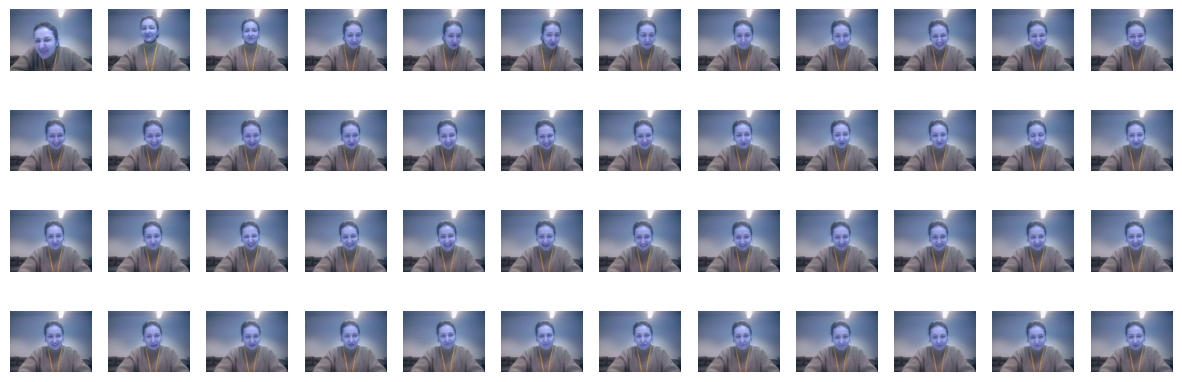

In [4]:

display_video_frames(frames= frames, n_rows = 4)


# Image Pre-processing 

## Gray-scale 

In [5]:
images_config = image_preprocessing.ImagesConfig(
    dir= 'toadstool/participant_5_video',
    img_format= '*.jpg',
    resize= False,
    gray_scale= True,
    output= 'toadstool/participant_5.npz'
)

image_prepocessor = image_preprocessing.ImagePreprocessing(images_config)
images, _ = image_prepocessor.get_images()

In [6]:
images.shape

(1, 50, 480, 640)

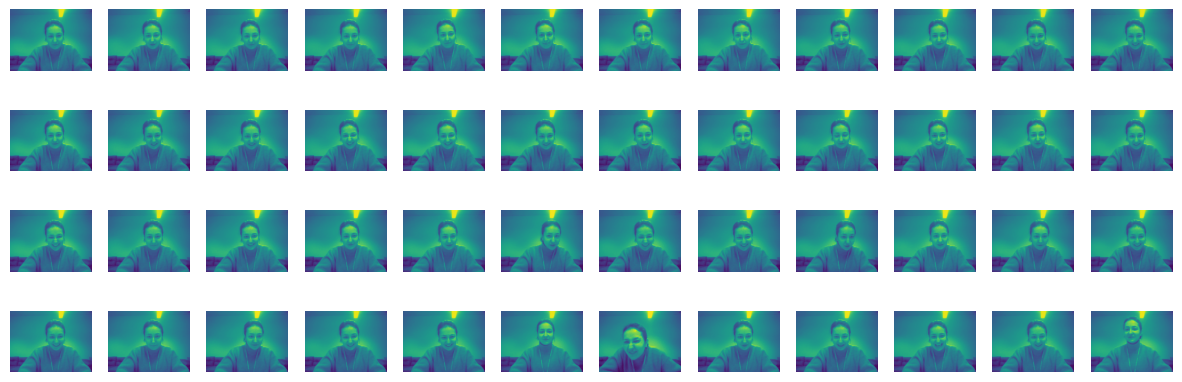

In [7]:
processed_frames = [images[0, i, :, :] for i in range(images.shape[1]) ]
display_video_frames(frames=processed_frames, n_rows = 4)


## Resize 

In [8]:
images_config = image_preprocessing.ImagesConfig(
    dir= 'toadstool/participant_5_video',
    img_format= '*.jpg',
    resize= True,
    img_height=224,
    img_width=224,
    gray_scale= True,
    output= 'toadstool/participant_5.npz'
)

image_prepocessor = image_preprocessing.ImagePreprocessing(images_config)
images, _ = image_prepocessor.get_images()

In [9]:
print(images.shape)

(1, 50, 224, 224)


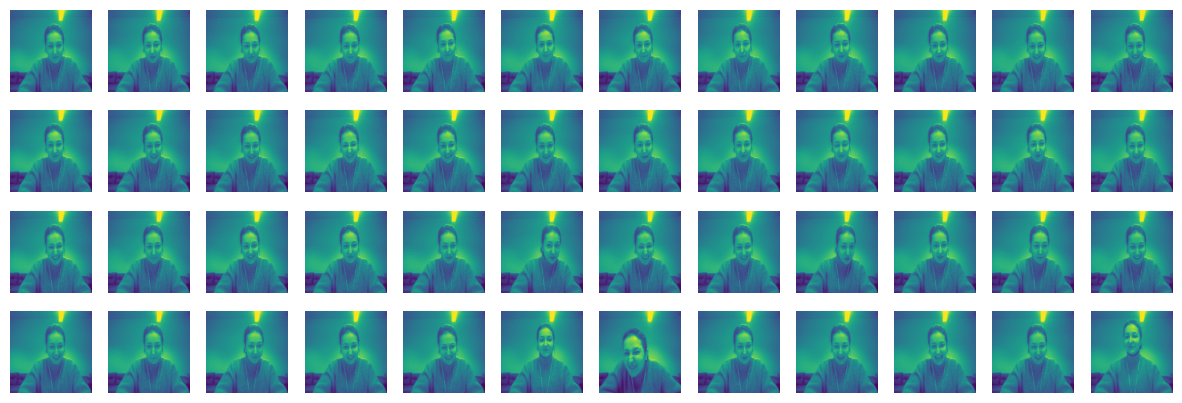

In [10]:
processed_frames = [images[0, i, :, :] for i in range(images.shape[1]) ]
display_video_frames(frames=processed_frames, n_rows = 4)


## Feature Extractor

In [11]:
from e2evideo import feature_extractor

input_path = 'toadstool/frames'
output_path = 'toadstool'



In [12]:
feature_config = feature_extractor.FeatureExtractorConfig(
       input_path = input_path,
       output_path = output_path
)
fe = feature_extractor.FeatureExtractor(feature_config)

filenames_, feature_vec_ = fe.extract_dinov2_features()



Read a total of  50 images


In [13]:
import os
import pandas as pd

connected_components_df_ = pd.read_csv(
            os.path.join(output_path, "connected_components.csv")
        )

In [14]:
feature_extractor.plot_tsne_3d(
    feature_vec_,
    connected_components_df_,
    filenames_,
    f"{output_path}/embeddings_dinvo2.html",
)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 8.614754
[t-SNE] KL divergence after 250 iterations with early exaggeration: 106.823639
[t-SNE] KL divergence after 300 iterations: 1.406325


In [15]:
from IPython.core.display import display, HTML
with open(f"{output_path}/embeddings_dinvo2.html", 'r') as f:
    html_content = f.read()

display(HTML(html_content))
